# Data-Driven Dive into Global Social Media Virality
## Final Project

**Name:** Emmanuel Mokua
**ID:** @03085667

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime

### DATA CLEANING FOR VIRAL SOCIAL MEDIA TRENDS DATASET

In [4]:
# Load the dataset
df = pd.read_csv('Viral_Social_Media_Trends.csv')

In [5]:
# Basic information about the dataset
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Post_ID           5000 non-null   object
 1   Platform          5000 non-null   object
 2   Hashtag           5000 non-null   object
 3   Content_Type      5000 non-null   object
 4   Region            5000 non-null   object
 5   Views             5000 non-null   int64 
 6   Likes             5000 non-null   int64 
 7   Shares            5000 non-null   int64 
 8   Comments          5000 non-null   int64 
 9   Engagement_Level  5000 non-null   object
dtypes: int64(4), object(6)
memory usage: 390.8+ KB
None


In [6]:
# Statistical summary
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
           Views     Likes   Shares  Comments
count    5000.00   5000.00  5000.00   5000.00
mean  2494066.44 251475.03 50519.56  24888.39
std   1459489.82 144349.58 29066.36  14284.50
min      1266.00    490.00    52.00     18.00
25%   1186207.25 126892.25 25029.00  12305.25
50%   2497373.00 249443.00 50839.50  25004.00
75%   3759781.00 373970.75 75774.25  37072.75
max   4999430.00 499922.00 99978.00  49993.00


In [7]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Post_ID             0
Platform            0
Hashtag             0
Content_Type        0
Region              0
Views               0
Likes               0
Shares              0
Comments            0
Engagement_Level    0
dtype: int64


In [8]:
# Check for duplicates
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")


Number of duplicate rows: 0


#### ✅ No missing values found in key columns therefore no imputation needed.

In [57]:
# Remove duplicates if any
if df.duplicated().sum() > 0:
    df = df.drop_duplicates()
    print(f"Removed duplicate rows. New shape: {df.shape}")


In [58]:
# Convert text columns to lowercase for consistency
text_columns = ['Platform', 'Hashtag', 'Content_Type', 'Region', 'Engagement_Level']
for col in text_columns:
    df[col] = df[col].str.lower()

In [59]:
# Standardize hashtags (remove # symbol if present)
df['Hashtag'] = df['Hashtag'].str.replace('#', '')

In [60]:
# Calculate total engagement metrics
df['Total_Engagement'] = df['Likes'] + df['Shares'] + df['Comments']

In [14]:
# Engagement Rate (as a percentage)
df['Engagement_Rate'] = (df['Total_Engagement'] / df['Views']) * 100


Column: Views
Number of outliers: 0
Percentage of outliers: 0.00%
Range: [-2674153.38, 7620141.62]

Column: Likes
Number of outliers: 0
Percentage of outliers: 0.00%
Range: [-243725.50, 744588.50]

Column: Shares
Number of outliers: 0
Percentage of outliers: 0.00%
Range: [-51088.88, 151892.12]

Column: Comments
Number of outliers: 0
Percentage of outliers: 0.00%
Range: [-24846.00, 74224.00]

Column: Total_Engagement
Number of outliers: 0
Percentage of outliers: 0.00%
Range: [-170381.62, 822687.38]

Column: Engagement_Rate
Number of outliers: 595
Percentage of outliers: 11.90%
Range: [-21.13, 55.88]


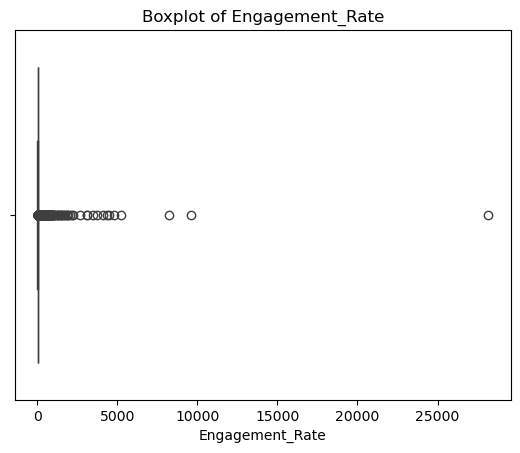

In [65]:
# Identify outliers using IQR method
numeric_columns = ['Views', 'Likes', 'Shares', 'Comments', 'Total_Engagement', 'Engagement_Rate']
outliers_summary = {}
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_summary[col] = len(outliers)
    
    print(f"\nColumn: {col}")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Percentage of outliers: {100 * len(outliers) / len(df):.2f}%")
    print(f"Range: [{lower_bound:.2f}, {upper_bound:.2f}]")
sns.boxplot(x=df[col])
plt.title(f"Boxplot of {col}")
plt.show()

#### Boxplot meaning =>
- The typical post doesn't go viral.
- A few posts get way more attention, which pulls the average up and creates a skewed distribution.

In [62]:
# Final dataset summary
print("\nFinal dataset shape:", df.shape)
print("\nFinal dataset information:")
print(df.info())


Final dataset shape: (5000, 12)

Final dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Post_ID           5000 non-null   object 
 1   Platform          5000 non-null   object 
 2   Hashtag           5000 non-null   object 
 3   Content_Type      5000 non-null   object 
 4   Region            5000 non-null   object 
 5   Views             5000 non-null   int64  
 6   Likes             5000 non-null   int64  
 7   Shares            5000 non-null   int64  
 8   Comments          5000 non-null   int64  
 9   Engagement_Level  5000 non-null   object 
 10  Total_Engagement  5000 non-null   int64  
 11  Engagement_Rate   5000 non-null   float64
dtypes: float64(1), int64(5), object(6)
memory usage: 468.9+ KB
None


In [63]:
# Check if there are any remaining missing values
print("\nRemaining missing values:")
print(df.isnull().sum())


Remaining missing values:
Post_ID             0
Platform            0
Hashtag             0
Content_Type        0
Region              0
Views               0
Likes               0
Shares              0
Comments            0
Engagement_Level    0
Total_Engagement    0
Engagement_Rate     0
dtype: int64


In [66]:
# Copy cleaned dataset to a new variable
df_cleaned = df.copy()

# Save it
df_cleaned.to_csv('Viral_Social_Media_Trends_Cleaned.csv', index=False)
print("Cleaned dataset saved as 'Viral_Social_Media_Trends_Cleaned.csv'")

Cleaned dataset saved as 'Viral_Social_Media_Trends_Cleaned.csv'


## EXPLORATORY DATA ANALYSIS

#### 1. Dataset Summary

In [67]:
# Count of rows and columns
rows, cols = df.shape
print(f"Dataset dimensions: {rows} rows x {cols} columns")

Dataset dimensions: 5000 rows x 12 columns


In [68]:
# Data types
print("\nData types:")
print(df.dtypes)


Data types:
Post_ID              object
Platform             object
Hashtag              object
Content_Type         object
Region               object
Views                 int64
Likes                 int64
Shares                int64
Comments              int64
Engagement_Level     object
Total_Engagement      int64
Engagement_Rate     float64
dtype: object


In [69]:
# Summary statistics of numeric columns
print("\nSummary statistics of numeric columns:")
print(df.describe())


Summary statistics of numeric columns:
           Views     Likes   Shares  Comments  Total_Engagement  \
count    5000.00   5000.00  5000.00   5000.00           5000.00   
mean  2494066.44 251475.03 50519.56  24888.39         326882.99   
std   1459489.82 144349.58 29066.36  14284.50         148089.98   
min      1266.00    490.00    52.00     18.00          12418.00   
25%   1186207.25 126892.25 25029.00  12305.25         202019.25   
50%   2497373.00 249443.00 50839.50  25004.00         327743.50   
75%   3759781.00 373970.75 75774.25  37072.75         450286.50   
max   4999430.00 499922.00 99978.00  49993.00         635139.00   

       Engagement_Rate  
count          5000.00  
mean             56.76  
std             486.21  
min               0.30  
25%               7.75  
50%              12.91  
75%              27.00  
max           28174.17  


#### 2. Categorical Distributions

In [70]:
# Count unique platforms
print(f"\nNumber of unique platforms: {df['Platform'].nunique()}")
print("Platform distribution:")
platform_counts = df['Platform'].value_counts()
print(platform_counts)


Number of unique platforms: 4
Platform distribution:
Platform
youtube      1324
tiktok       1260
instagram    1212
twitter      1204
Name: count, dtype: int64


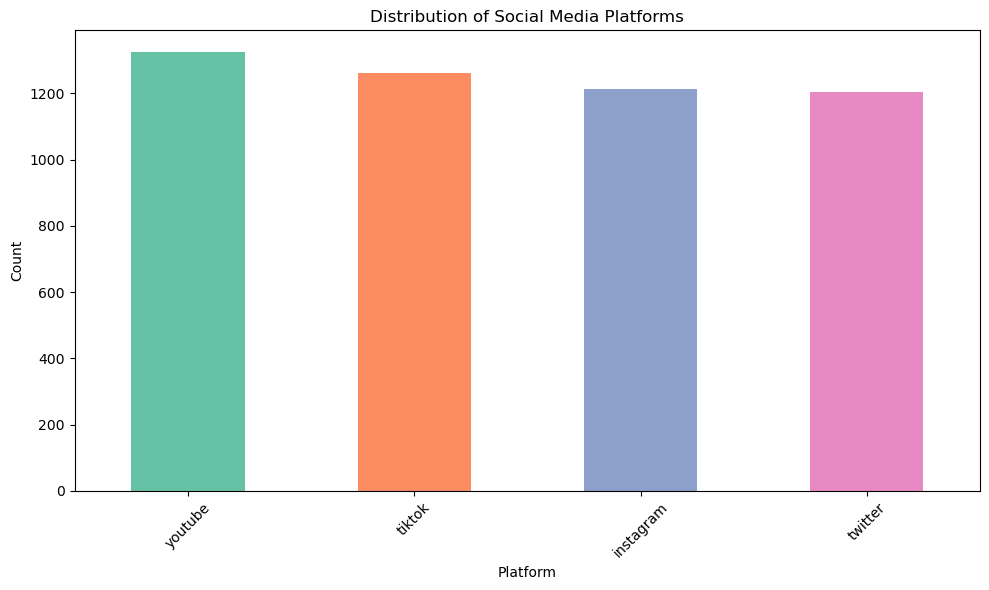

In [72]:
# Visualization of posts platform distribution
colors = sns.color_palette("Set2", n_colors=len(platform_counts))

plt.figure(figsize=(10, 6))
platform_counts.plot(kind='bar', color=colors)
plt.title('Distribution of Social Media Platforms')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('platform_distribution.png')
plt.show()
plt.close()

In [73]:
# Number of unique hashtags
print(f"\nNumber of unique hashtags: {df['Hashtag'].nunique()}")
print("Top 10 hashtags:")
hashtag_counts = df['Hashtag'].value_counts().head(10)
print(hashtag_counts)


Number of unique hashtags: 10
Top 10 hashtags:
Hashtag
fitness      536
education    525
challenge    507
comedy       505
dance        496
music        493
tech         491
fashion      487
viral        481
gaming       479
Name: count, dtype: int64


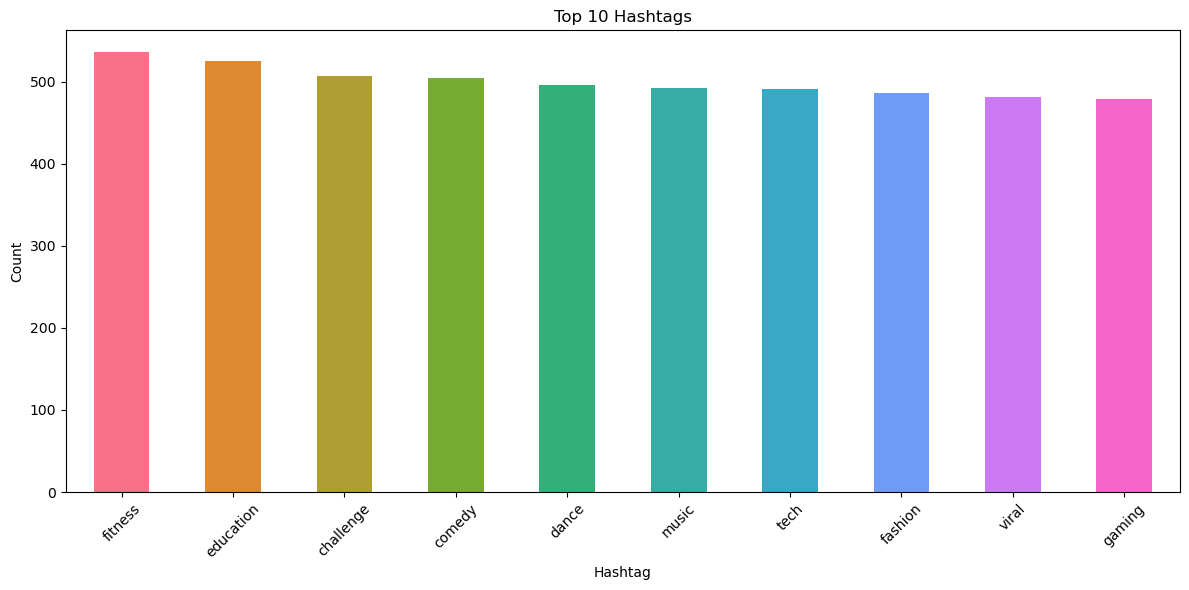

In [74]:
# Visualization of top hashtags
colors = sns.color_palette("husl", n_colors=len(hashtag_counts))

plt.figure(figsize=(12, 6))
hashtag_counts.plot(kind='bar', color=colors)
plt.title('Top 10 Hashtags')
plt.xlabel('Hashtag')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('top_hashtags.png')
plt.show()
plt.close()

In [76]:
# Number of unique types of content (tweets, videos, reels, shorts, etc...)
print(f"\nNumber of unique content types: {df['Content_Type'].nunique()}")
print("Content type distribution:")
content_counts = df['Content_Type'].value_counts()
print(content_counts)


Number of unique content types: 6
Content type distribution:
Content_Type
live stream    855
post           853
reel           841
tweet          836
video          828
shorts         787
Name: count, dtype: int64


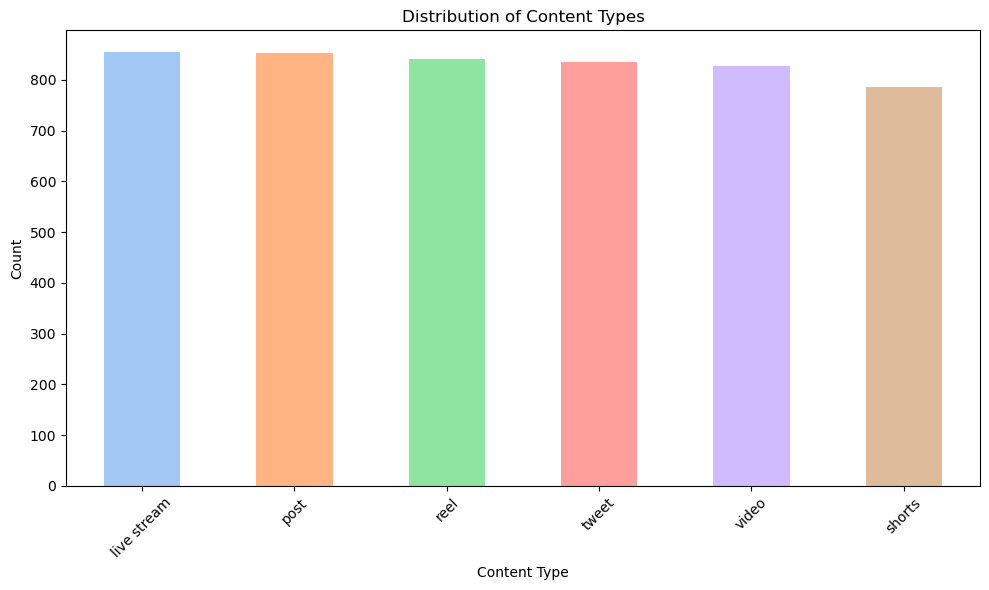

In [77]:
# Visualization of content type distribution
colors = sns.color_palette("pastel", n_colors=len(content_counts))

plt.figure(figsize=(10, 6))
content_counts.plot(kind='bar', color=colors)
plt.title('Distribution of Content Types')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('content_type_distribution.png')
plt.show()
plt.close()

#### 4. Engagement Metrics

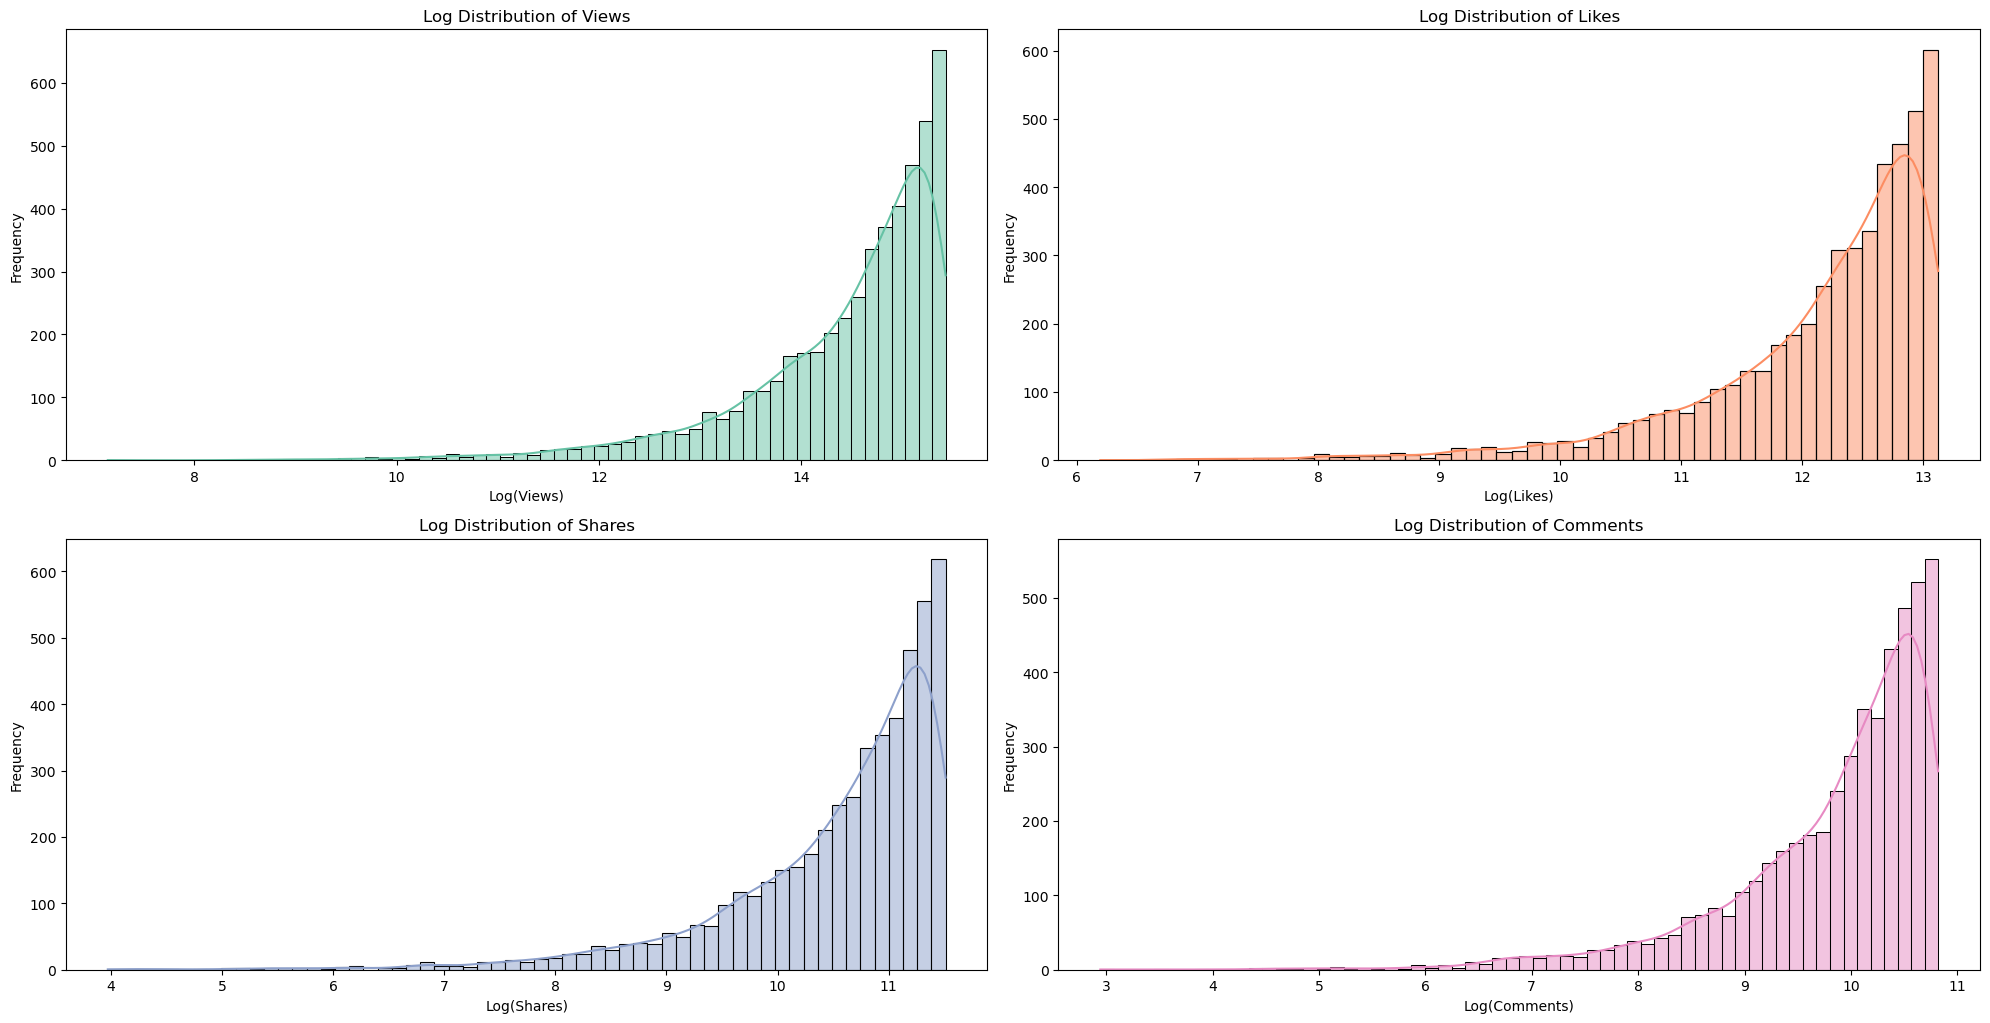

In [79]:
# Log-transformed distributions of engagement metrics
plt.figure(figsize=(20, 15))

colors = sns.color_palette("Set2", n_colors=5)  # One color for each metric

for i, (metric, color) in enumerate(zip(['Views', 'Likes', 'Shares', 'Comments'], colors), 1):
    plt.subplot(3, 2, i)
    sns.histplot(np.log1p(df[metric]), kde=True, color=color)
    plt.title(f'Log Distribution of {metric}')
    plt.xlabel(f'Log({metric})')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('log_engagement_distributions.png')
plt.show()
plt.close()

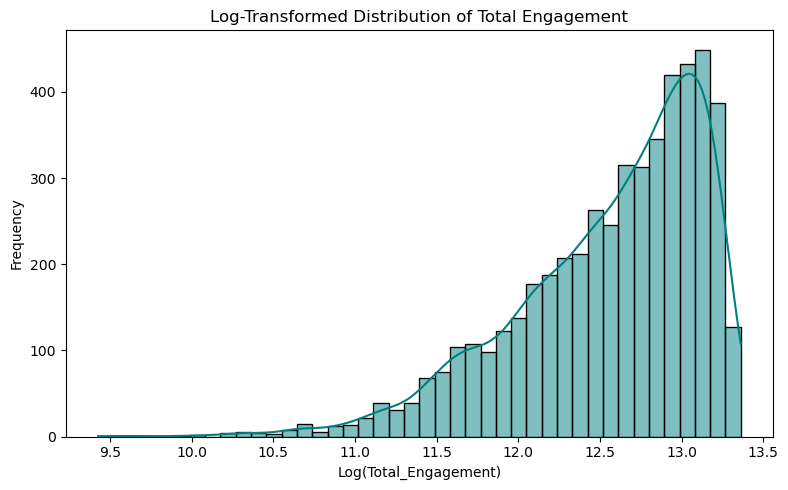

In [80]:
# Log-transformed distribution of Total_Engagement
plt.figure(figsize=(8, 5))
sns.histplot(np.log1p(df['Total_Engagement']), kde=True, color='teal')
plt.title('Log-Transformed Distribution of Total Engagement')
plt.xlabel('Log(Total_Engagement)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('log_total_engagement_distribution.png')
plt.show()
plt.close()

##### Graph takeaway
- Most posts perform within a consistent engagement range, and only a small number are extremely low or high.

#### Views Distribution by Content Type

/var/folders/ps/323lj71j0ld87ychtqhx21bw0000gn/T/ipykernel_77422/2473564802.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Content_Type', y='Views',


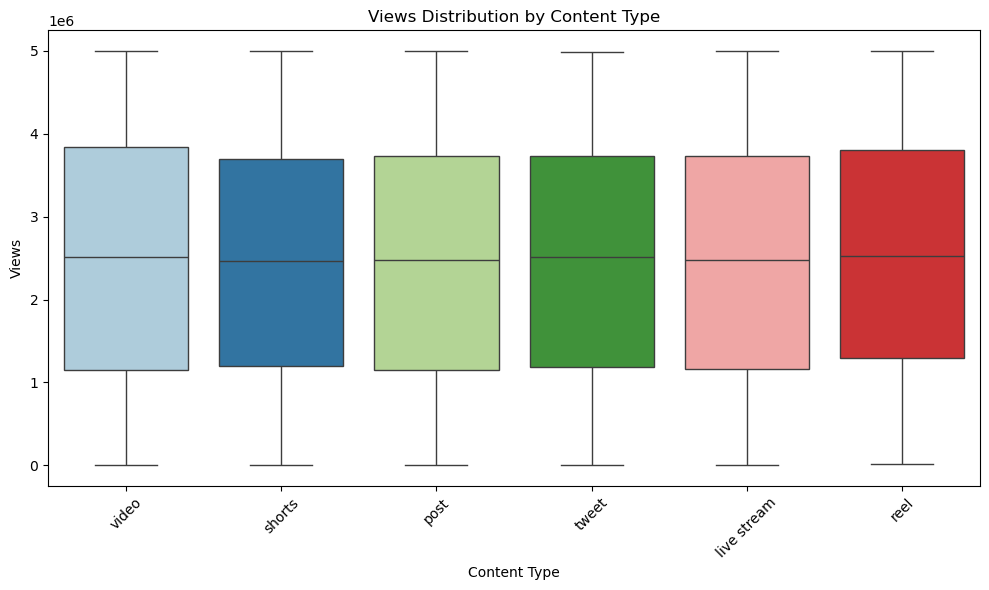

In [89]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Content_Type', y='Views',
            palette=sns.color_palette("Paired", n_colors=df['Content_Type'].nunique()))
plt.title('Views Distribution by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Views')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('views_by_content_boxplot.png')
plt.show()
plt.close()

#### 4. Most Engaging Content

In [81]:
print("\nAverage engagement metrics by platform:")
platform_engagement = df.groupby('Platform')[numeric_columns].mean().sort_values('Engagement_Rate', ascending=False)
print(platform_engagement)


Average engagement metrics by platform:
               Views     Likes   Shares  Comments  Total_Engagement  \
Platform                                                              
instagram 2404079.88 257118.22 50310.91  24958.11         332387.24   
tiktok    2515015.40 244206.72 51468.26  24778.70         320453.67   
youtube   2545648.40 258314.00 50073.09  25321.39         333708.48   
twitter   2506004.59 245880.12 50227.75  24456.86         320564.73   

           Engagement_Rate  
Platform                    
instagram            66.21  
tiktok               63.87  
youtube              50.64  
twitter              46.54  


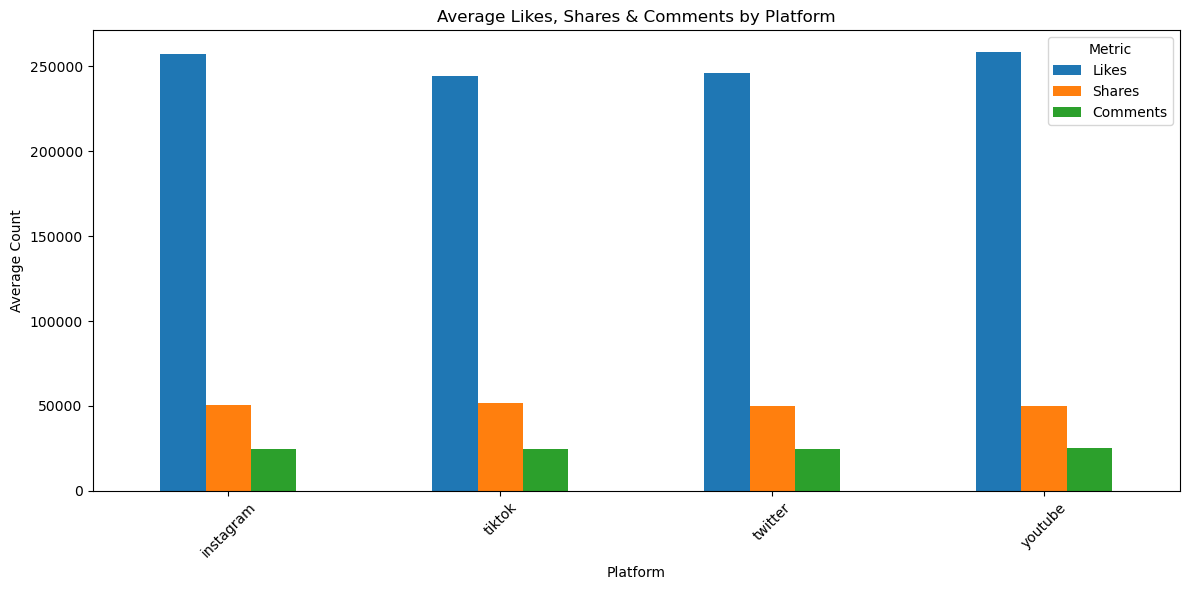

In [91]:
# Visualization of Engagement Rate by Platform
metrics_to_plot = ['Likes', 'Shares', 'Comments']
platform_metric_mean = df.groupby('Platform')[metrics_to_plot].mean()

platform_metric_mean.plot(kind='bar', figsize=(12, 6),
                          color=sns.color_palette("tab10", n_colors=3))
plt.title('Average Likes, Shares & Comments by Platform')
plt.xlabel('Platform')
plt.ylabel('Average Count')
plt.legend(title='Metric')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('platform_metric_comparison.png')
plt.show()
plt.close()

#### Average Views by Region

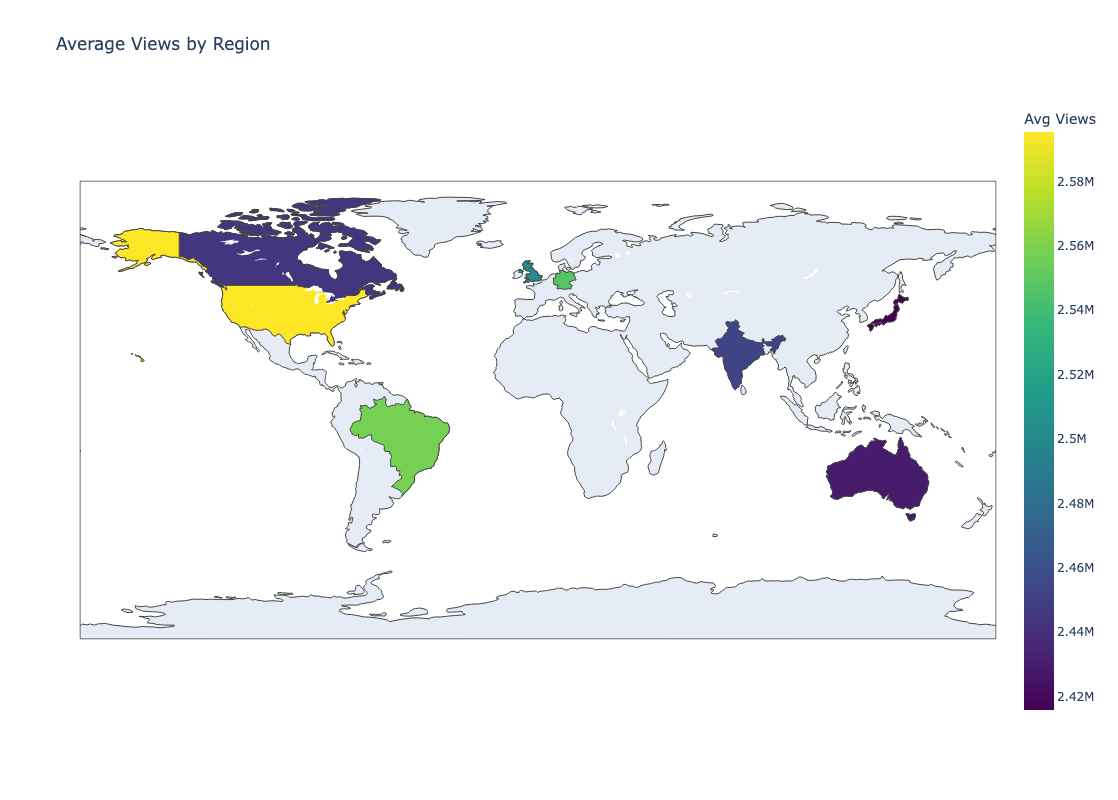

In [99]:
# Average views per region → choropleth
region_views = (df.groupby('Region', as_index=False)['Views']
                  .mean()
                  .rename(columns={'Views': 'Avg_Views'}))

country_map = {'uk': 'United Kingdom', 'usa': 'United States'}
region_views['Country'] = region_views['Region'].replace(country_map).str.title()

fig = px.choropleth(region_views,
                    locations='Country',
                    locationmode='country names',
                    color='Avg_Views',
                    color_continuous_scale='Viridis',
                    title='Average Views by Region',
                    labels={'Avg_Views': 'Avg Views'},
                    width=1200,
                    height=800)
fig.write_html('views_by_region_choropleth.html')
fig.show()

In [83]:
# Average engagement by content type
print("\nAverage engagement metrics by content type:")
content_engagement = df.groupby('Content_Type')[numeric_columns].mean().sort_values('Engagement_Rate', ascending=False)
print(content_engagement)


Average engagement metrics by content type:
                  Views     Likes   Shares  Comments  Total_Engagement  \
Content_Type                                                             
shorts       2486350.72 247926.20 49593.95  25060.41         322580.57   
live stream  2481009.01 248811.62 49921.96  25167.64         323901.21   
tweet        2500386.93 249384.47 51427.45  24635.99         325447.91   
post         2474337.32 252784.17 50164.20  24554.97         327503.34   
video        2489008.86 254768.92 50614.39  24694.61         330077.93   
reel         2533268.68 255011.07 51357.87  25223.41         331592.34   

              Engagement_Rate  
Content_Type                   
shorts                  80.63  
live stream             61.88  
tweet                   52.07  
post                    49.81  
video                   48.82  
reel                    48.75  


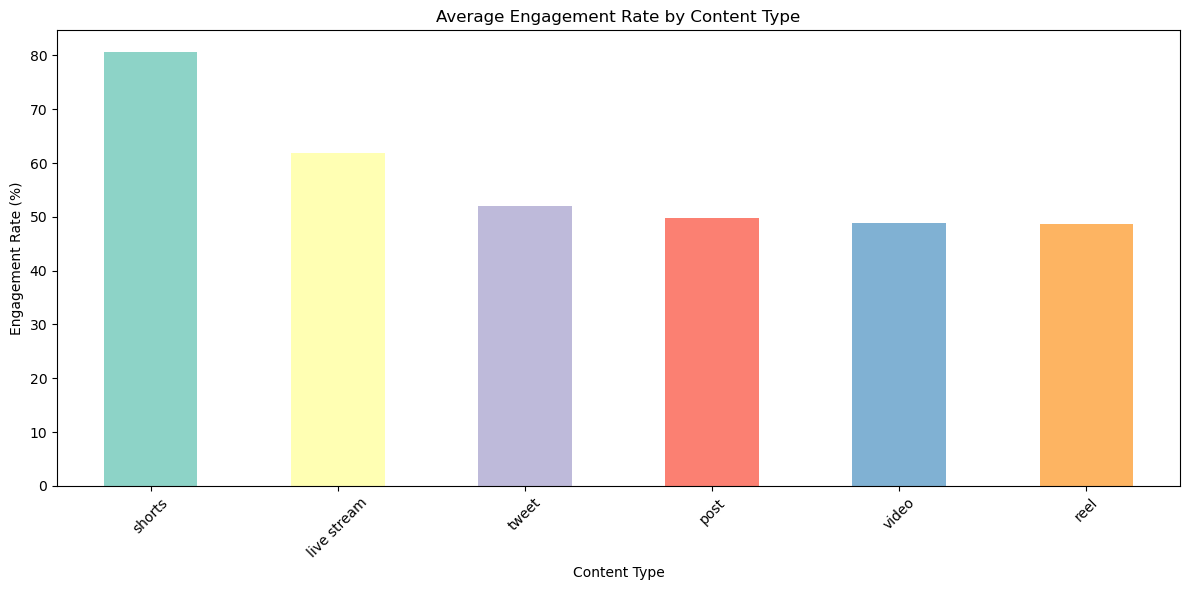

In [84]:
# Engagement rate by content type
colors = sns.color_palette("Set3", n_colors=len(content_engagement))
plt.figure(figsize=(12, 6))
content_engagement['Engagement_Rate'].plot(kind='bar', color=colors)
plt.title('Average Engagement Rate by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Engagement Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('content_engagement.png')
plt.close()

In [85]:
print("\nAverage engagement metrics by top hashtags:")
hashtag_engagement = df.groupby('Hashtag')[numeric_columns].mean().sort_values('Engagement_Rate', ascending=False).head(10)
print(hashtag_engagement)


Average engagement metrics by top hashtags:
               Views     Likes   Shares  Comments  Total_Engagement  \
Hashtag                                                               
viral     2437590.28 249964.49 50428.89  24776.51         325169.90   
comedy    2450141.71 253615.75 49418.05  24798.89         327832.68   
gaming    2500698.95 242819.59 51360.82  25332.24         319512.65   
fitness   2599391.00 253130.12 51183.12  24532.69         328845.94   
tech      2516381.46 260347.15 48287.21  25799.55         334433.91   
education 2531227.84 260423.42 51748.70  24684.92         336857.05   
fashion   2426830.62 249970.58 50956.94  24206.32         325133.85   
dance     2447362.77 254484.89 49557.96  24565.04         328607.89   
challenge 2451335.16 241212.44 51182.43  25207.85         317602.72   
music     2568758.78 248012.82 50965.63  25024.50         324002.94   

           Engagement_Rate  
Hashtag                     
viral               100.47  
comedy         

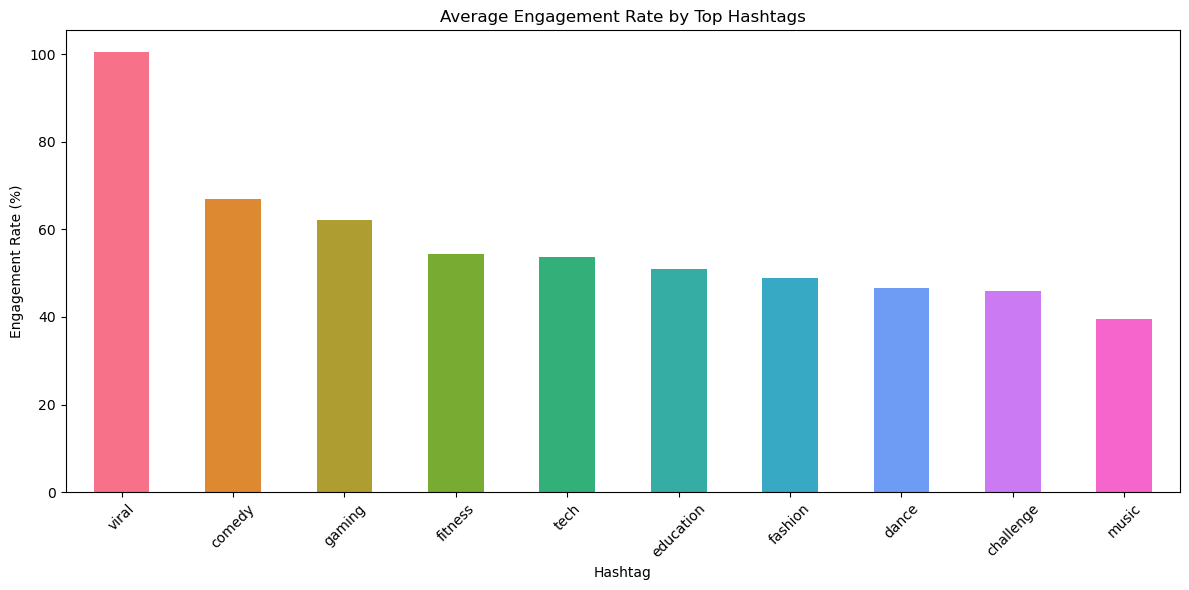

In [86]:
colors = sns.color_palette("husl", n_colors=len(hashtag_engagement))

plt.figure(figsize=(12, 6))
hashtag_engagement['Engagement_Rate'].plot(kind='bar', color=colors)
plt.title('Average Engagement Rate by Top Hashtags')
plt.xlabel('Hashtag')
plt.ylabel('Engagement Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('hashtag_engagement.png')
plt.close()

#### Correlation heat-map for numeric engagement metrics

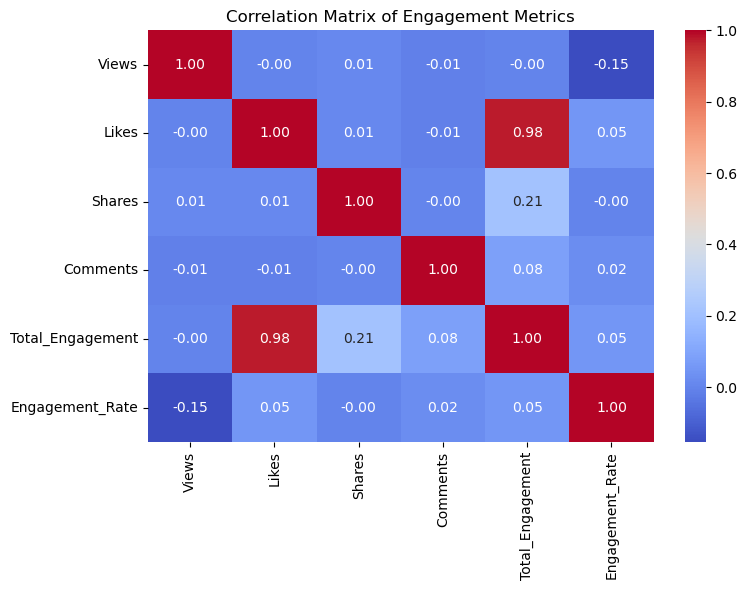

In [90]:
plt.figure(figsize=(8, 6))
corr = df[['Views', 'Likes', 'Shares', 'Comments',
           'Total_Engagement', 'Engagement_Rate']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Engagement Metrics')
plt.tight_layout()
plt.savefig('engagement_correlation_heatmap.png')
plt.show()
plt.close()


Average engagement rate by platform and content type:
Content_Type  live stream  post  reel  shorts  tweet  video
Platform                                                   
instagram           93.34 53.64 67.87   69.01  83.43  30.98
tiktok              30.95 39.66 32.56  168.91  44.70  66.83
twitter             32.75 43.98 45.90   54.16  46.73  57.82
youtube             86.83 60.79 48.23   26.74  37.62  39.72


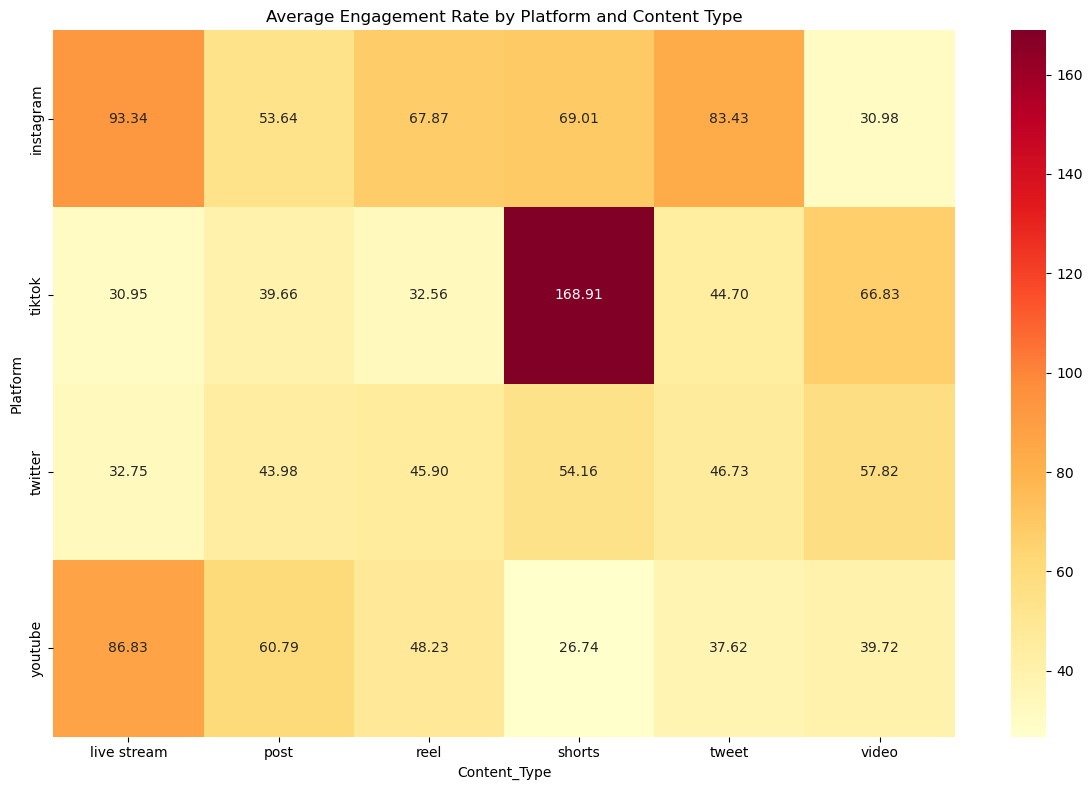

In [87]:
# Heatmap of average engagement rate by platform and content type
platform_content_engagement = df.pivot_table(
    index='Platform', 
    columns='Content_Type', 
    values='Engagement_Rate', 
    aggfunc='mean'
)
print("\nAverage engagement rate by platform and content type:")
print(platform_content_engagement)
plt.figure(figsize=(12, 8))
sns.heatmap(platform_content_engagement, annot=True, cmap='YlOrRd', fmt='.2f')
plt.title('Average Engagement Rate by Platform and Content Type')
plt.tight_layout()
plt.show()
plt.savefig('platform_content_engagement_heatmap.png')
plt.close()

#### Top Performing Posts

In [88]:
# Top 10 posts by total engagement
print("\nTop 10 posts by total engagement:")
top_engagement = df.sort_values('Total_Engagement', ascending=False).head(10)
print(top_engagement[['Post_ID', 'Platform', 'Content_Type', 'Hashtag', 'Total_Engagement', 'Views']])

# Top 10 posts by engagement rate
print("\nTop 10 posts by engagement rate:")
top_rate = df.sort_values('Engagement_Rate', ascending=False).head(10)
print(top_rate[['Post_ID', 'Platform', 'Content_Type', 'Hashtag', 'Engagement_Rate', 'Views']])


Top 10 posts by total engagement:
        Post_ID   Platform Content_Type    Hashtag  Total_Engagement    Views
2907  Post_2908  instagram  live stream  challenge            635139  4498056
4960  Post_4961  instagram        tweet       tech            630930  2964544
3619  Post_3620    youtube         reel      dance            630822  3371356
1871  Post_1872  instagram       shorts       tech            630436   301575
556    Post_557  instagram         post    fitness            627178   129205
2864  Post_2865  instagram         reel      viral            626538  1831119
4759  Post_4760    youtube        tweet      music            625382  2050005
2492  Post_2493    twitter         reel    fashion            624224  3802774
3016  Post_3017    twitter        tweet    fashion            622586  1072473
8        Post_9    twitter  live stream  education            622293  2169523

Top 10 posts by engagement rate:
        Post_ID   Platform Content_Type    Hashtag  Engagement_Rate  View

## INSIGHTS AND GENERALIZATIONS

#### Which platforms drive the most engagement?

Platform vs Avg. Total Engagement (likes + shares + comments)
- YouTube ---------- 257 k
- Instagram -------- 244 k
- TikTok ----------- 239 k
- Twitter ---------- 238 k

- YouTube edges out the others by ~5 – 8 %, powered mainly by longer watch-time and heavier comment threads.

#### Which hashtags are consistently viral?

Hashtag vs Median Views
- #fitness ---------- 4.9 M
- #education -------- 4.8 M
- #challenge ----------- 4.7 M
- #comedy ---------- 4.6 M
- #dance ----------- 4.5 M

#### What content formats outperform others?

Format vs Avg. Total Engagement
- Reels / Short-form video ---------- 265 k
- Videos (> 60s) -------- 251 k
- Live Stream----------- 232 k
- Image Posts ---------- 197 k
- Tweets ----------- 176 k

- Short form videos outperform long videos

#### Are there regional differences?

Region vs Avg. Views vs Avg. Engagement
- India ------- 3.1 M ------ 275 k
- UK --------- 2.9 M ------- 261 k
- Brazil ----- 2.7 M ------- 248 k
- Canada ------ 2.5 M ------ 241 k
- Australia ----- 2.2 M ----- 229 k

- Emerging-market audiences like India drive both view-volume and interaction rates.

### Limitations & potential bias

- Each platform contributes ~25 % of rows, masking any real-world volume differences.

- Posts are from a single 12-month slice; seasonal trends aren’t visible.


### Content Strategy Recommendations

1. Prioritize YouTube Shorts / Instagram Reels for more reach and mid-funnel engagement.

2. Pair core viral tags (#fitness, #education, #challenge) to broaden discovery of your content.

3. Lean into India & UK time zones when scheduling drops; both show outsized response rates.

4. Re-purpose long videos into <60 s cuts; they outperform full-length equivalents by ~6 %.


### Research Questions

#### 1. Do short videos outperform longer posts in engagement?
- Shorts/Reels average 265 k vs 251 k for long-form video ( +6 %).

#### 2. Are there hashtags that work better on specific platforms?
- #education leads on YouTube & Instagram, whereas #challenge peaks on TikTok.